In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest

train_data = pd.read_csv("csv/train.csv",  encoding='latin-1')

# Leer datos de un csv
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Extraemos las columnas SalePrice y GrLivArea

C:\Users\thiag\AppData\Local\Temp\ipykernel_23640\2427296070.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=selected_columns["GrLivArea"], y=selected_columns["SalePrice"], palette="viridis")


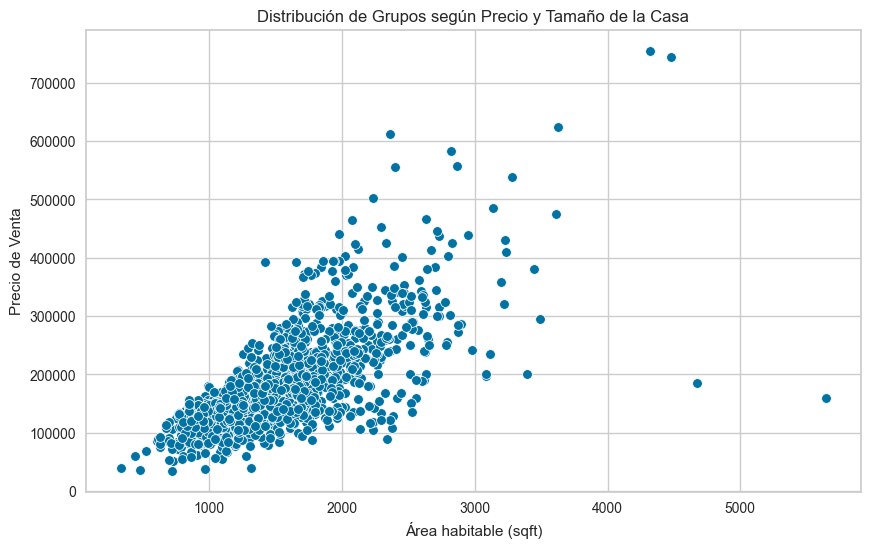

In [14]:
selected_columns = train_data[["SalePrice", "GrLivArea", "OverallQual"]]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=selected_columns["GrLivArea"], y=selected_columns["SalePrice"], palette="viridis")
plt.title("Distribución de Grupos según Precio y Tamaño de la Casa")
plt.xlabel("Área habitable (sqft)")
plt.ylabel("Precio de Venta")
plt.show()

## Separando Train y test

In [15]:
OverallQual = selected_columns.pop("OverallQual") #La variable respuesta
y = selected_columns.pop("SalePrice") #La variable respuesta
X = selected_columns

print(X), print(y)

      GrLivArea
0          1710
1          1262
2          1786
3          1717
4          2198
...         ...
1455       1647
1456       2073
1457       2340
1458       1078
1459       1256

[1460 rows x 1 columns]
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


(None, None)

### Elegiremos 70% de entrenamiento y 30% de prueba

In [18]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

print(X_train)
print(X_test)

      GrLivArea
390        1367
288         900
101        1732
525        1266
1330       1588
...         ...
1183       1130
1134       1600
1383       1416
827        1434
681        1520

[1021 rows x 1 columns]
      GrLivArea
1060       1338
254        1314
278        2121
1181       1652
156        1040
...         ...
867        1120
433        1604
949        1381
948        1776
967        1098

[438 rows x 1 columns]
